In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [2]:
#Exploratory Analysis

In [3]:
traindata= pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
traindata.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
#Data cleaning and manipulation

In [5]:
traindata.iloc[7:10]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [6]:
#It is clear that there are some duplicates in the DataFrame, such as in rows 7, 8 and 9.  it is unlikely that two people have identical lifestyle, health, and demographic values, let's create a clean copy of the dataset by removing the duplicates.

In [7]:
# Let's find out if there are duplicates in the DataFrame
duplicated_rows = traindata[traindata.drop(columns ="Person ID").duplicated()]
duplicated_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 2 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                242 non-null    int64  
 1   Gender                   242 non-null    object 
 2   Age                      242 non-null    int64  
 3   Occupation               242 non-null    object 
 4   Sleep Duration           242 non-null    float64
 5   Quality of Sleep         242 non-null    int64  
 6   Physical Activity Level  242 non-null    int64  
 7   Stress Level             242 non-null    int64  
 8   BMI Category             242 non-null    object 
 9   Blood Pressure           242 non-null    object 
 10  Heart Rate               242 non-null    int64  
 11  Daily Steps              242 non-null    int64  
 12  Sleep Disorder           96 non-null     object 
dtypes: float64(1), int64(7), object(5)
memory usage: 26.5+ KB


In [8]:
# There are 242 duplicates in the dataset. Let's remove them.

In [9]:
df = traindata.drop_duplicates(subset=traindata.columns[1:]).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                132 non-null    int64  
 1   Gender                   132 non-null    object 
 2   Age                      132 non-null    int64  
 3   Occupation               132 non-null    object 
 4   Sleep Duration           132 non-null    float64
 5   Quality of Sleep         132 non-null    int64  
 6   Physical Activity Level  132 non-null    int64  
 7   Stress Level             132 non-null    int64  
 8   BMI Category             132 non-null    object 
 9   Blood Pressure           132 non-null    object 
 10  Heart Rate               132 non-null    int64  
 11  Daily Steps              132 non-null    int64  
 12  Sleep Disorder           59 non-null     object 
dtypes: float64(1), int64(7), object(5)
memory usage: 13.5+ KB


In [10]:
#Now we move on to cleaning the categorical data. Under 'BMI Category', 'Normal weight' and 'Normal' refer to the same thing. 

In [11]:
#Replace 'Normal Weight' with 'Normal'
traindata['BMI Category']= traindata['BMI Category'].replace({'Normal Weight': 'Normal'})
traindata['BMI Category']= traindata['BMI Category'].replace({'Obese': 'Overweight'})
traindata['BMI Category'].value_counts().reset_index()

,BMI Category,count
0,Normal,216
1,Overweight,158


In [12]:
#For 'Occupation', 'Saleperson' and 'Sales Representative' refer to the same occupation. Hence we merge them.
#Likewise for 'Software Engineer' and 'Engineer'
#The 'Scientist' and 'Manager' occupations are too poorly represented in the dataset to enable significant analysis, thus let's delete the rows related to them from the DataFrame.

In [13]:
# Merging similar Occupations
df["Occupation"] = traindata["Occupation"].replace({'Sales Representative': 'Salesperson'})

df["Occupation"] = traindata["Occupation"].replace({'Software Engineer': 'Engineer'})

In [14]:
# Delete the Rows with Scientist and Manager as Occupation
index_drop = df[df['Occupation'].isin(['Manager', 'Scientist'])].index
df = df.drop(index_drop)

In [15]:
df['Occupation'].value_counts()

Occupation
Doctor                  65
Accountant              21
Engineer                14
Teacher                 11
Lawyer                   8
Nurse                    7
Sales Representative     2
Name: count, dtype: int64

In [16]:
#Sleep Quality Data Statistics

Mean: 7.125
Median: 7.0
Mode: 6


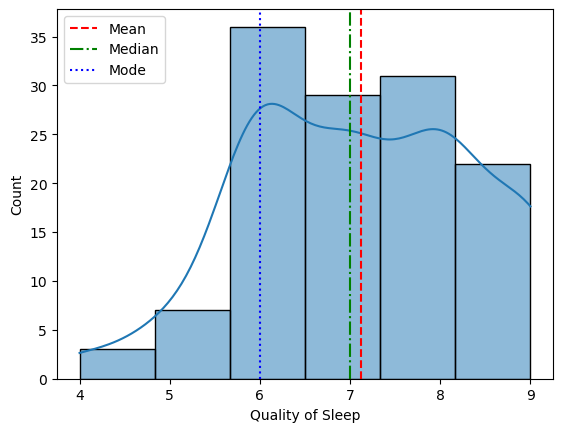

In [17]:
# Mean, Median, Mode, Skewness
mean = df['Quality of Sleep'].mean()
median = df['Quality of Sleep'].median()
mode = df['Quality of Sleep'].mode()[0]

# Print the skewness
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)


#Create histogram
sb.histplot(x = 'Quality of Sleep', data = df, bins = 6, kde = True)

# Add mean, median, and mode to the graph
plt.axvline(x = mean, color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(x = median, color = 'green', linestyle = '-.', label = 'Median')
plt.axvline(x = mode, color = 'blue', linestyle = ':', label = 'Mode')
plt.legend()
plt.show()


In [18]:
#Findings: Distribution of 'Quality of Sleep' Indicates negative skewness. Also, The distribution has two peaks, indicating a bimodal distribution. 

In [19]:
#Analysis of numeric variables:

In [20]:
traindata=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
vars = ['Sleep Duration','Daily Steps','Age']
pd.DataFrame(traindata[vars])

,Sleep Duration,Daily Steps,Age
0,6.1,4200,27
1,6.2,10000,28
2,6.2,10000,28
3,5.9,3000,28
4,5.9,3000,28
...,...,...,...
369,8.1,7000,59
370,8.0,7000,59
371,8.1,7000,59
372,8.1,7000,59


Sleep Duration : 0 outliers
Daily Steps : 0 outliers
Age : 0 outliers


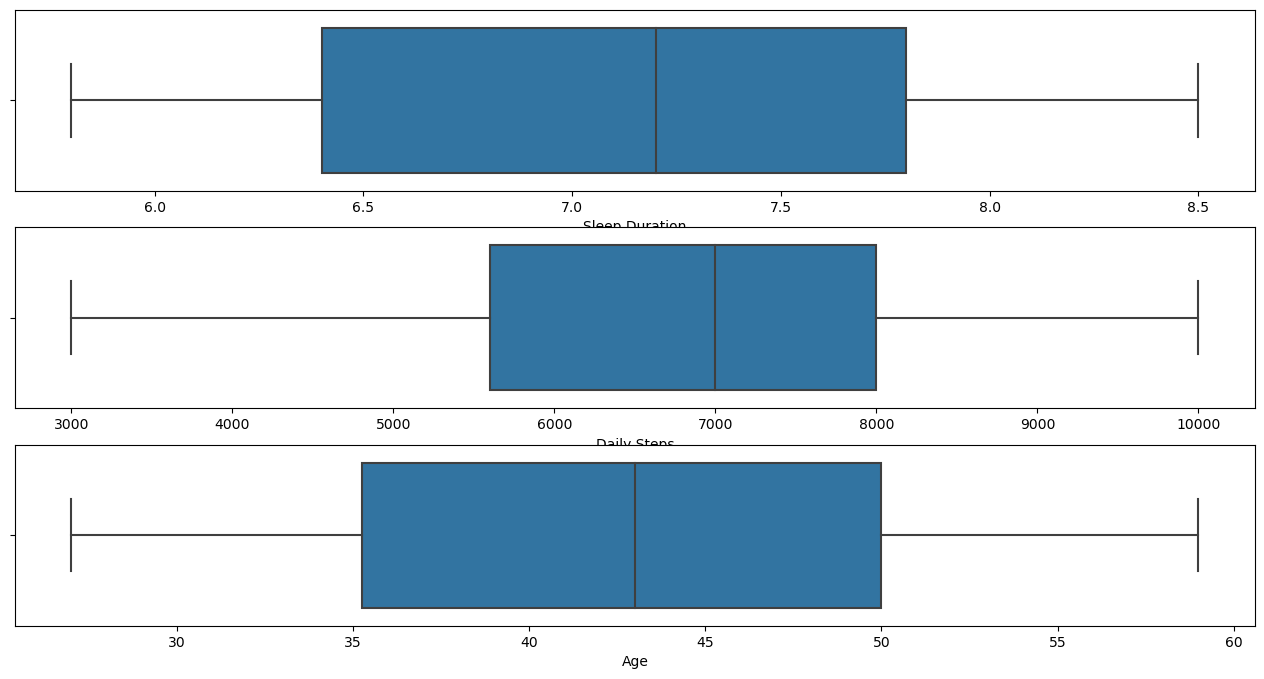

In [21]:
f, axes = plt.subplots(len(vars),1, figsize=(16, 8))
for k, var in enumerate(vars):
    sb.boxplot(x=traindata[var], ax=axes[k], orient="h")
    
    Q1 = traindata[var].quantile(0.25)
    Q3 = traindata[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((traindata[var] < (Q1 - 1.5 * IQR)) | (traindata[var] > (Q3 + 1.5 * IQR)))
    print(var, ":", outliers.sum(), "outliers")

In [22]:
#Findings: there are no outliers in the numeric variables.

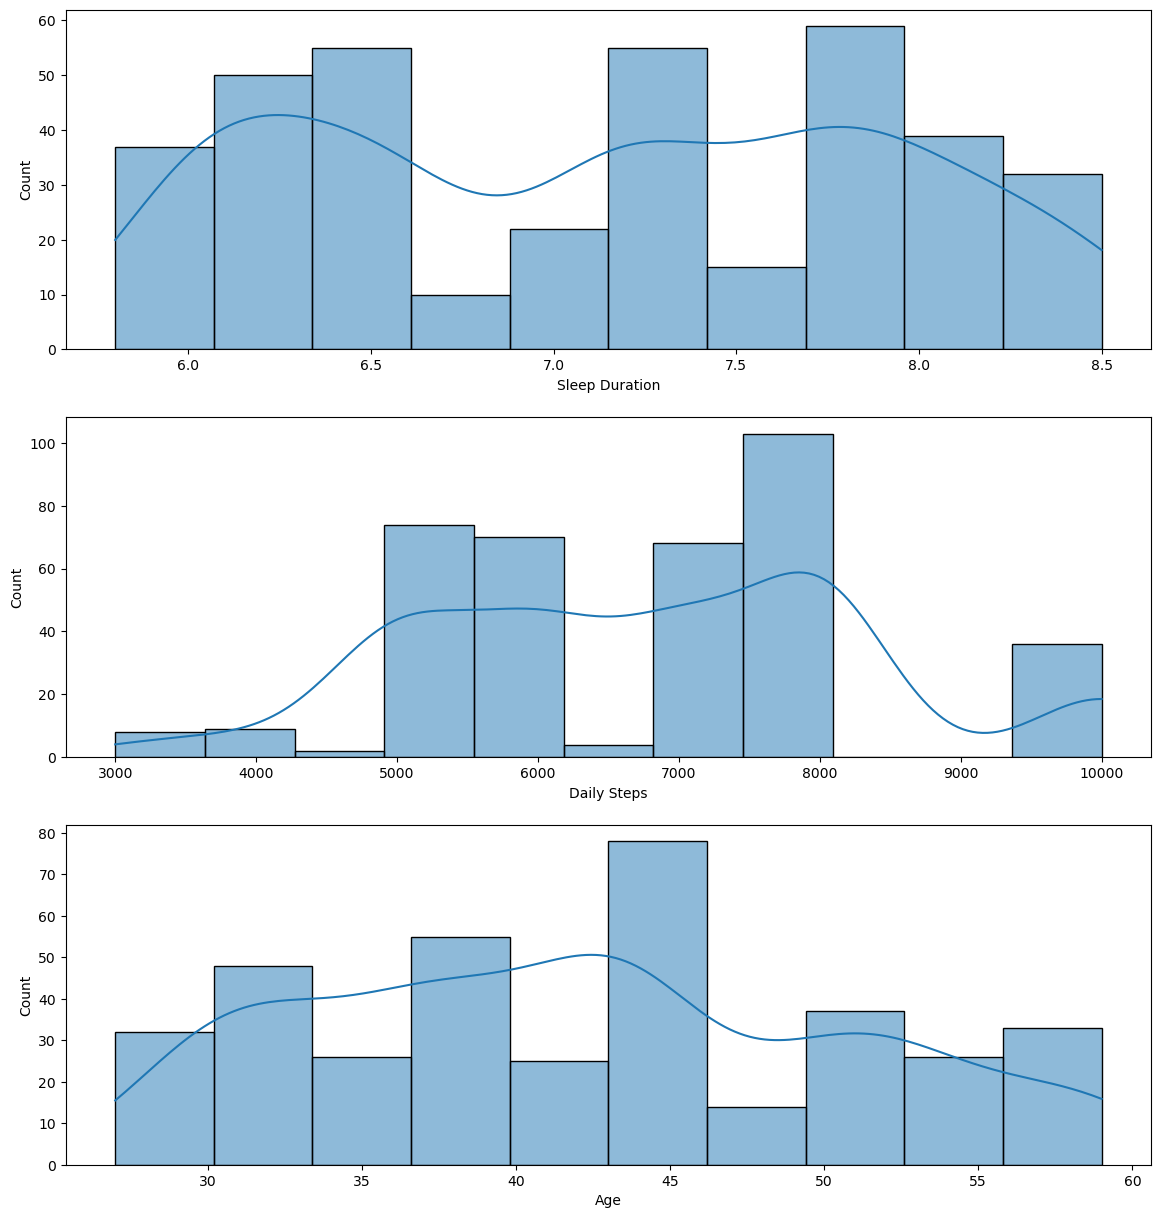

In [23]:
f, axes = plt.subplots(len(vars),1, figsize = (14,15))
for k, var in enumerate(vars):
    sb.histplot(traindata[var], kde = True, ax = axes[k])

In [24]:
for var in vars:
    mean = round(traindata[var].mean(), 2)
    median = traindata[var].median()
    difference = round(mean - median, 2)
    print(var, "\nMean:", mean, "\nMedian:", median, "\nDifference:", difference, "\n")

Sleep Duration 
Mean: 7.13 
Median: 7.2 
Difference: -0.07 

Daily Steps 
Mean: 6816.84 
Median: 7000.0 
Difference: -183.16 

Age 
Mean: 42.18 
Median: 43.0 
Difference: -0.82 



In [25]:
#Findings: 'Daily Steps' is the most skewed from the normal distrubution as the mean and median has the largest difference. Moreover, the negative difference indicates that mean<median thus the skew is negative. 

                  Sleep Duration  Daily Steps       Age  Quality of Sleep
Sleep Duration          1.000000    -0.039533  0.344709          0.883213
Daily Steps            -0.039533     1.000000  0.057973          0.016791
Age                     0.344709     0.057973  1.000000          0.473734
Quality of Sleep        0.883213     0.016791  0.473734          1.000000


<Axes: >

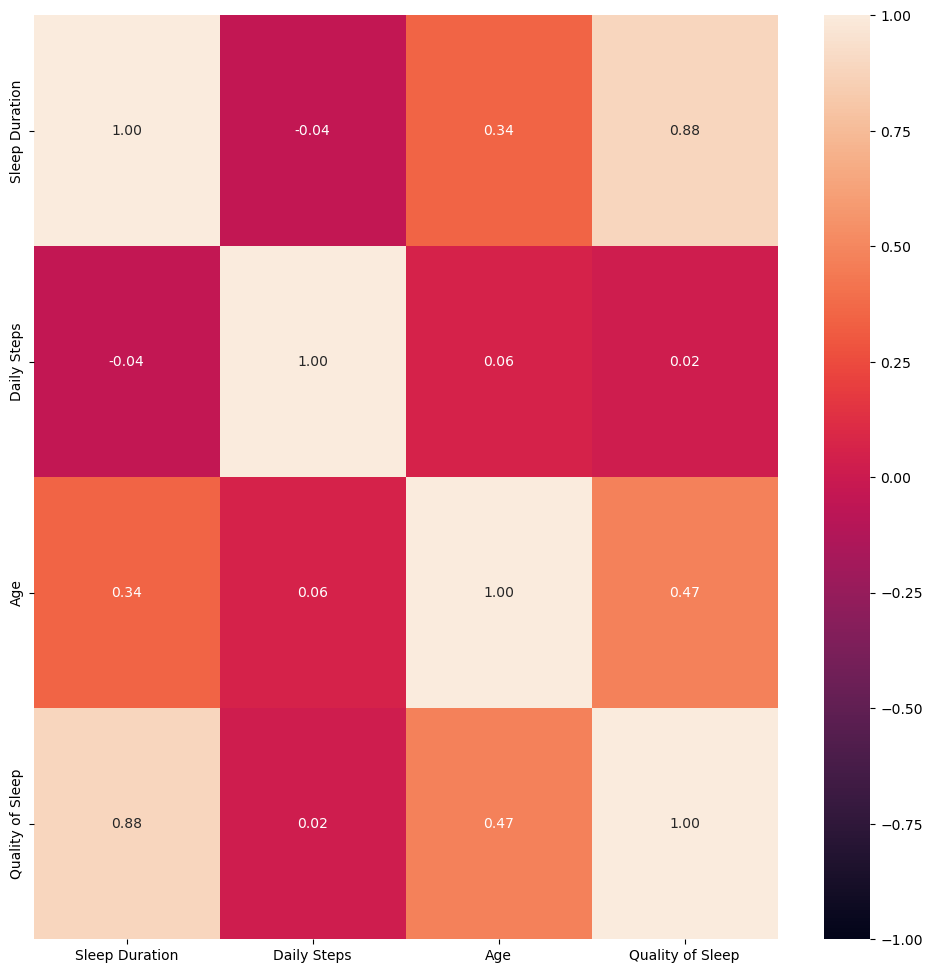

In [26]:
varQual=['Sleep Duration', 'Daily Steps', 'Age', 'Quality of Sleep']
dframe=pd.DataFrame(traindata[varQual])
print(dframe.corr())
f = plt.figure(figsize=(12, 12))
sb.heatmap(dframe.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [27]:
#Findings: 'Sleep Duration' and 'Age' has the highest correlation with 'Quality of sleep', 0.88 and 0.47 respectively and will be used in the Linear Regression Model. On the other hand, 'Daily Steps' has almost no correlation, 0.02.

In [28]:
#Analysis of Categorical Variables

In [29]:
VarCategorical=['BMI Category', 'Stress Level', 'Occupation']
categorical_Data= pd.DataFrame(traindata[VarCategorical])
categorical_Data['BMI Category'] = categorical_Data['BMI Category'].astype('category')
categorical_Data['Stress Level'] = categorical_Data['Stress Level'].astype('category')
categorical_Data['Occupation'] = categorical_Data['Occupation'].astype('category')

In [30]:
categorical_Data.describe()

,BMI Category,Stress Level,Occupation
count,374,374,374
unique,4,6,11
top,Normal,3,Nurse
freq,195,71,73


<Axes: xlabel='BMI Category', ylabel='Quality of Sleep'>

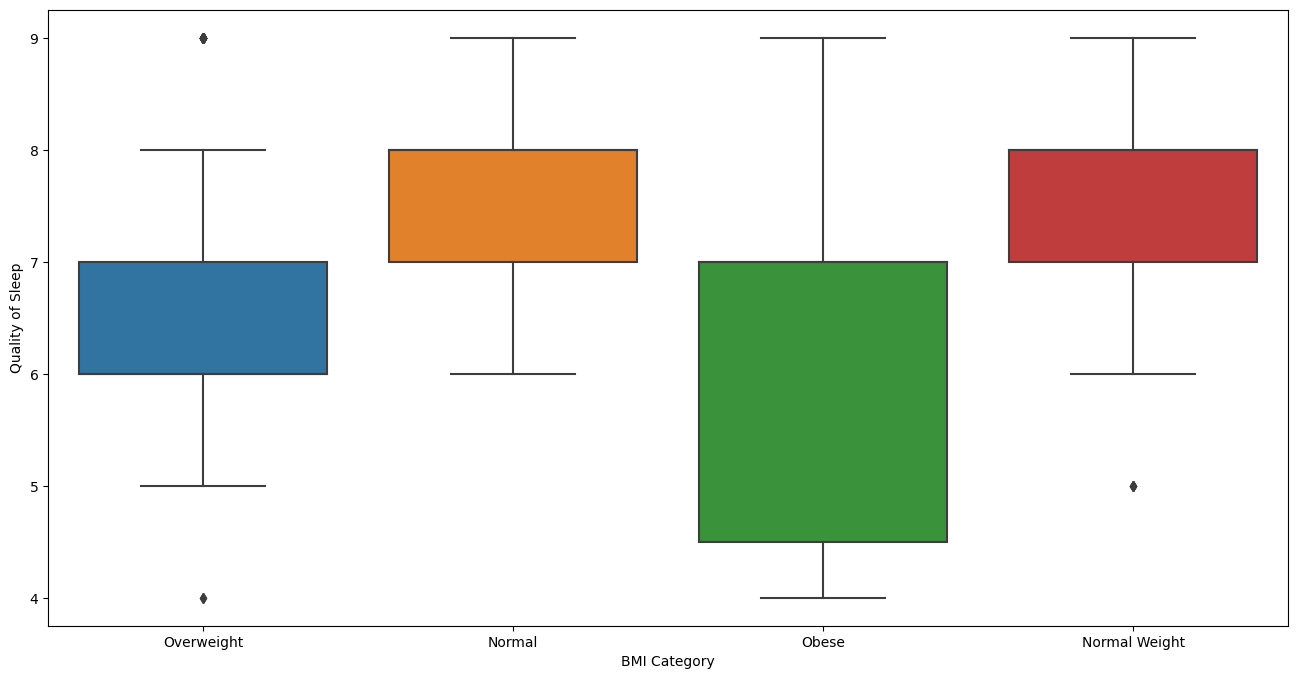

In [31]:
QualSleep= pd.DataFrame(traindata['Quality of Sleep'])
CategorySale = pd.concat([traindata[['BMI Category','Stress Level','Occupation']], QualSleep], axis = 1)
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'BMI Category', y = 'Quality of Sleep', data = CategorySale)

<Axes: xlabel='Stress Level', ylabel='Quality of Sleep'>

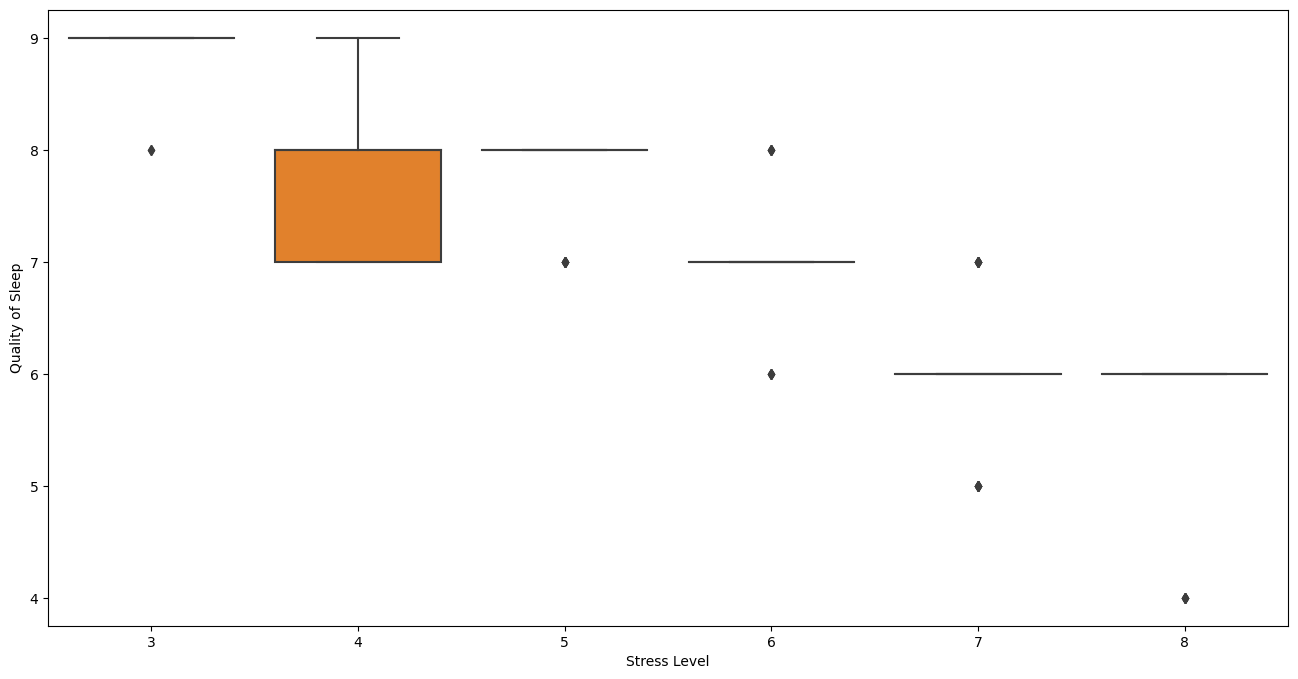

In [32]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Stress Level', y = 'Quality of Sleep', data = CategorySale)


<Axes: xlabel='Occupation', ylabel='Quality of Sleep'>

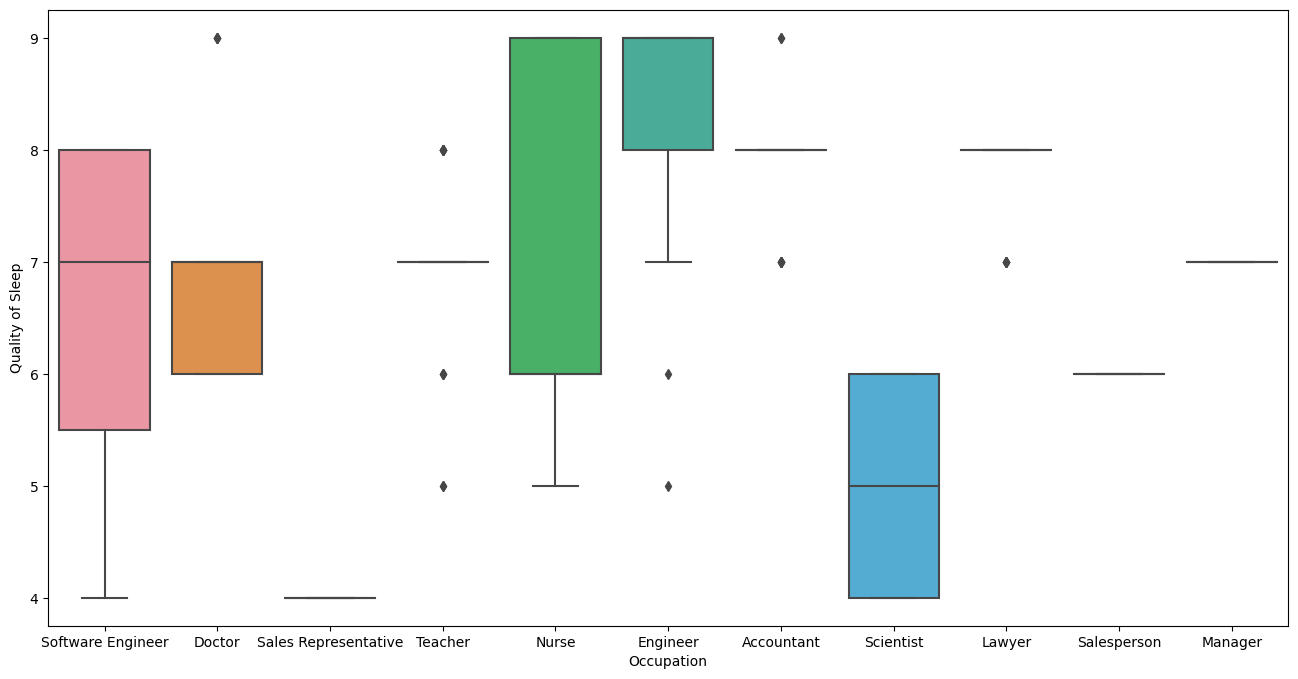

In [33]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Occupation', y = 'Quality of Sleep', data = CategorySale)

In [34]:
#It is clear that 'Occupation and BMI Category' are the 2 variables that will help in predicting 'Quality of Sleep' as they have a higher variation in 'Quality of Sleep' across all levels.